In [1]:
%run common-imports.ipynb

# PIPELINE

Let's build polynomial regression on the `univariate-2` dataset. using pipelines that organize the various steps of data preprocessing and a training machine learning model, removing tedious steps.

## Load and explore the data

perform the usual steps of exploratory data analysis.
* load the data, and check for missing values if any. 
* seperate out the predictor from the response
* split the data into the train and test set
* visualize the data as a scatter plot


In [2]:
data = pd.read_csv("../datasets/dataset-2.csv")
data.describe()

,x,y
count,99.000000,99.000000
mean,3.148976,-0.028816
std,1.880196,1.002099
min,0.038072,-1.529792
25%,1.457762,-1.058620
50%,3.081753,0.014350
75%,4.777492,0.901731
max,6.246581,1.561481


In [3]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [4]:
X, y = data[['x']], data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, )

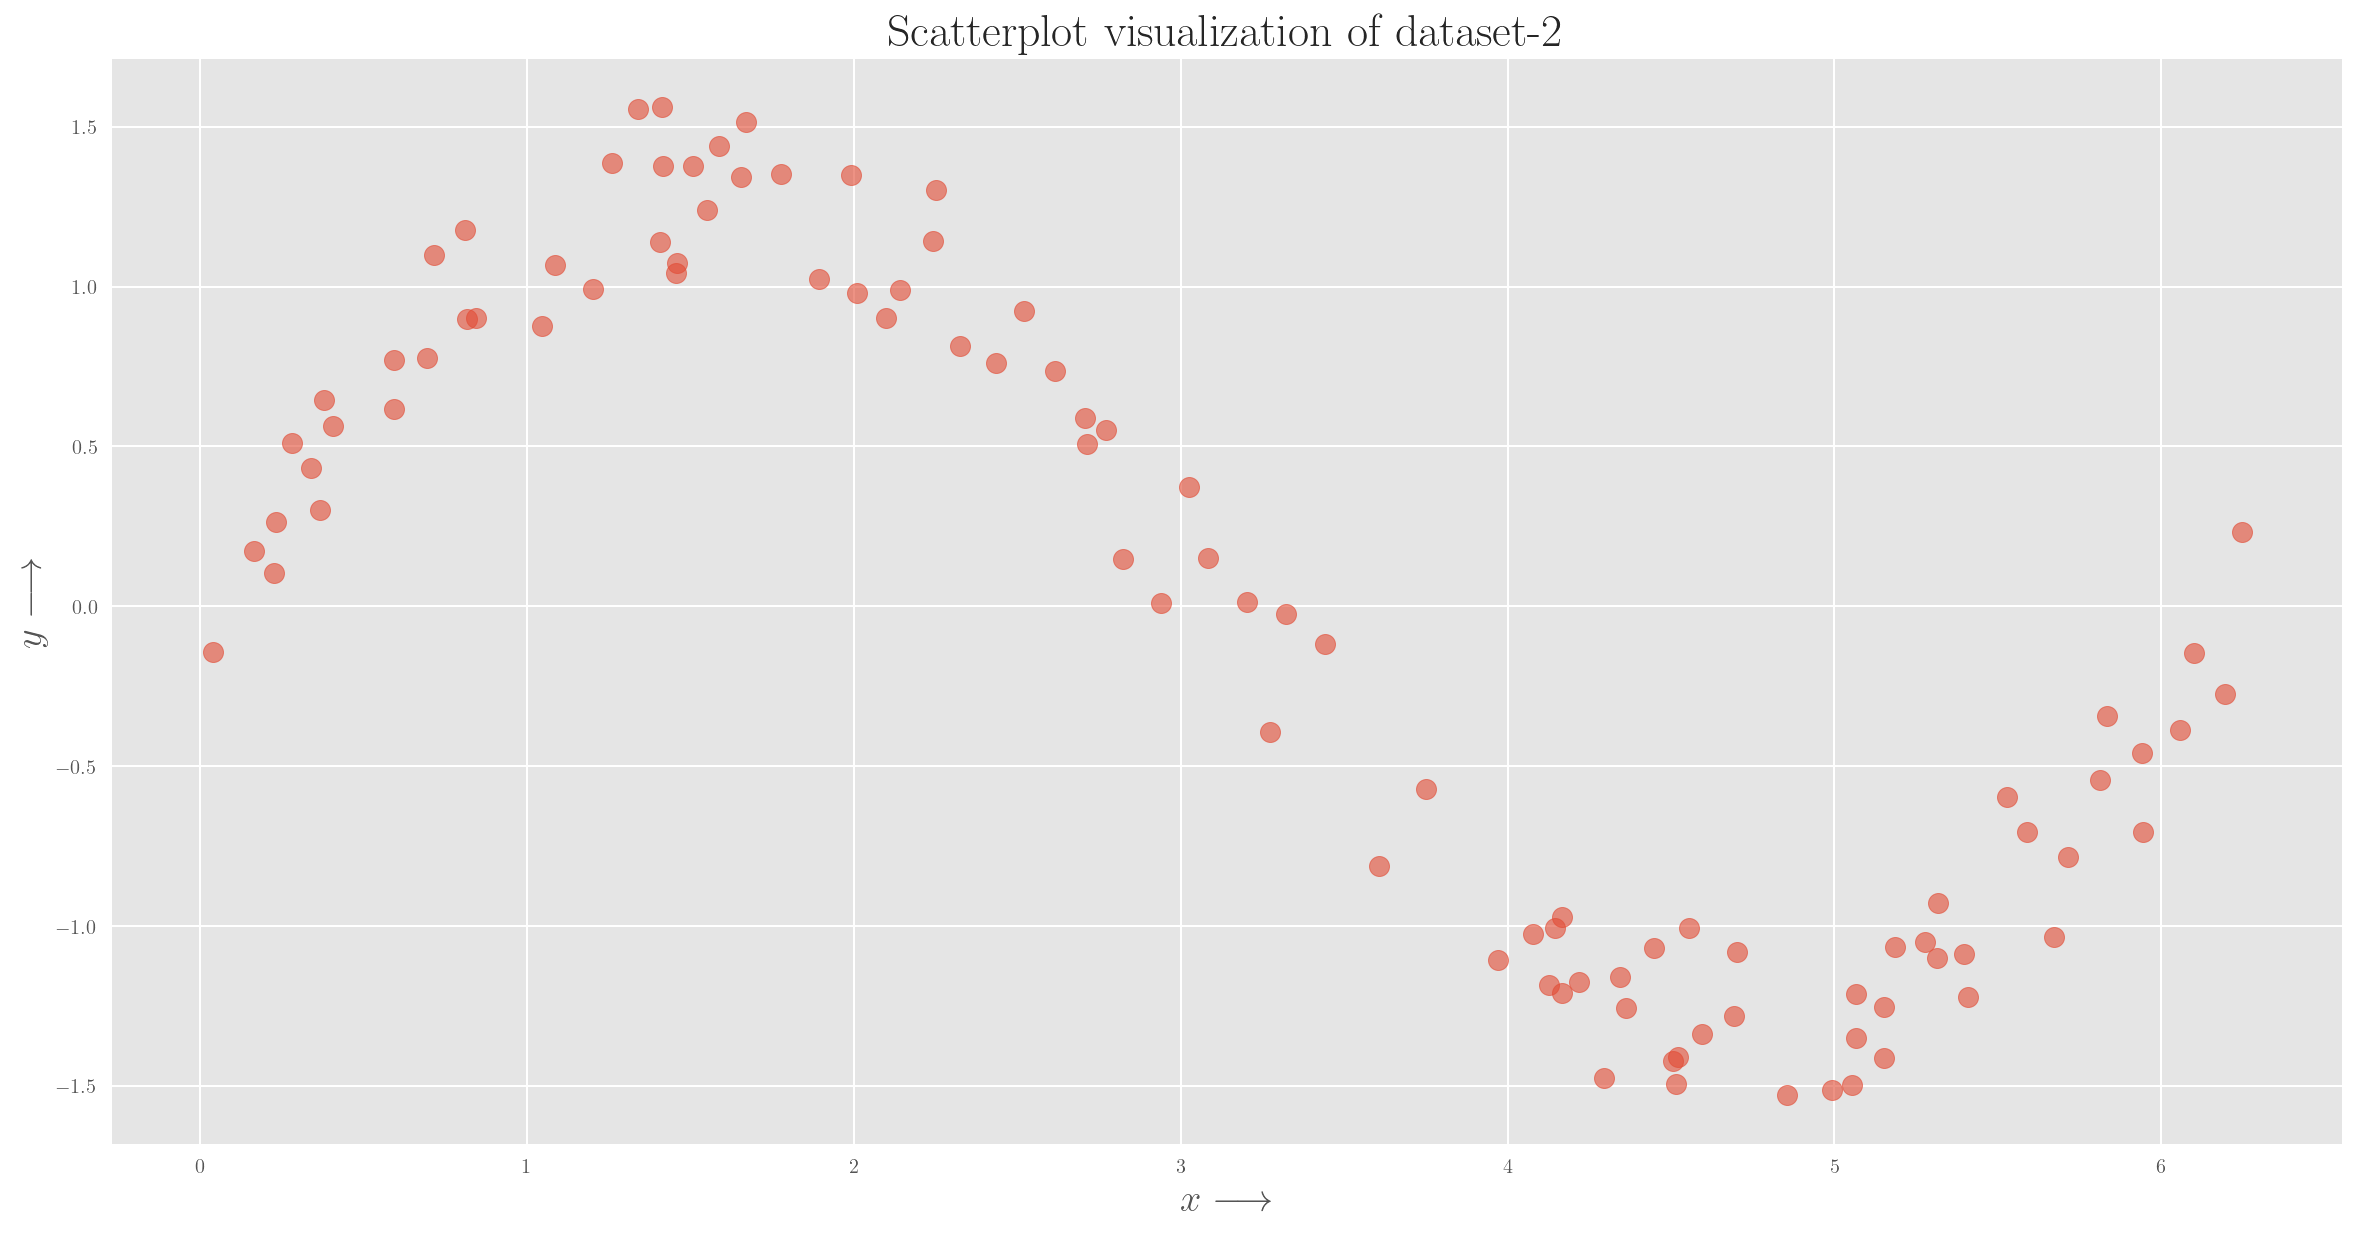

In [5]:
plt.scatter(data['x'], data['y'], s=100, alpha=0.6);
plt.xlabel(r'$x\longrightarrow$')
plt.ylabel(r'$y\longrightarrow$')
plt.title(r'Scatterplot visualization of dataset-2 ');

## Standardization of the data

Data needs to be scaled, for a variety of reasons. While `sklearn` provides us with a few scalers, by far the most commonly employed is the `StandardScaler`, which z-values the feature.


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

visualize the effect of scaling the training data. We see that it is now zero-centered $(\mu_x = 0)$. It is not so apparent, but the data scaled to also have unit-variance $(\sigma_x^2 = 1)$.

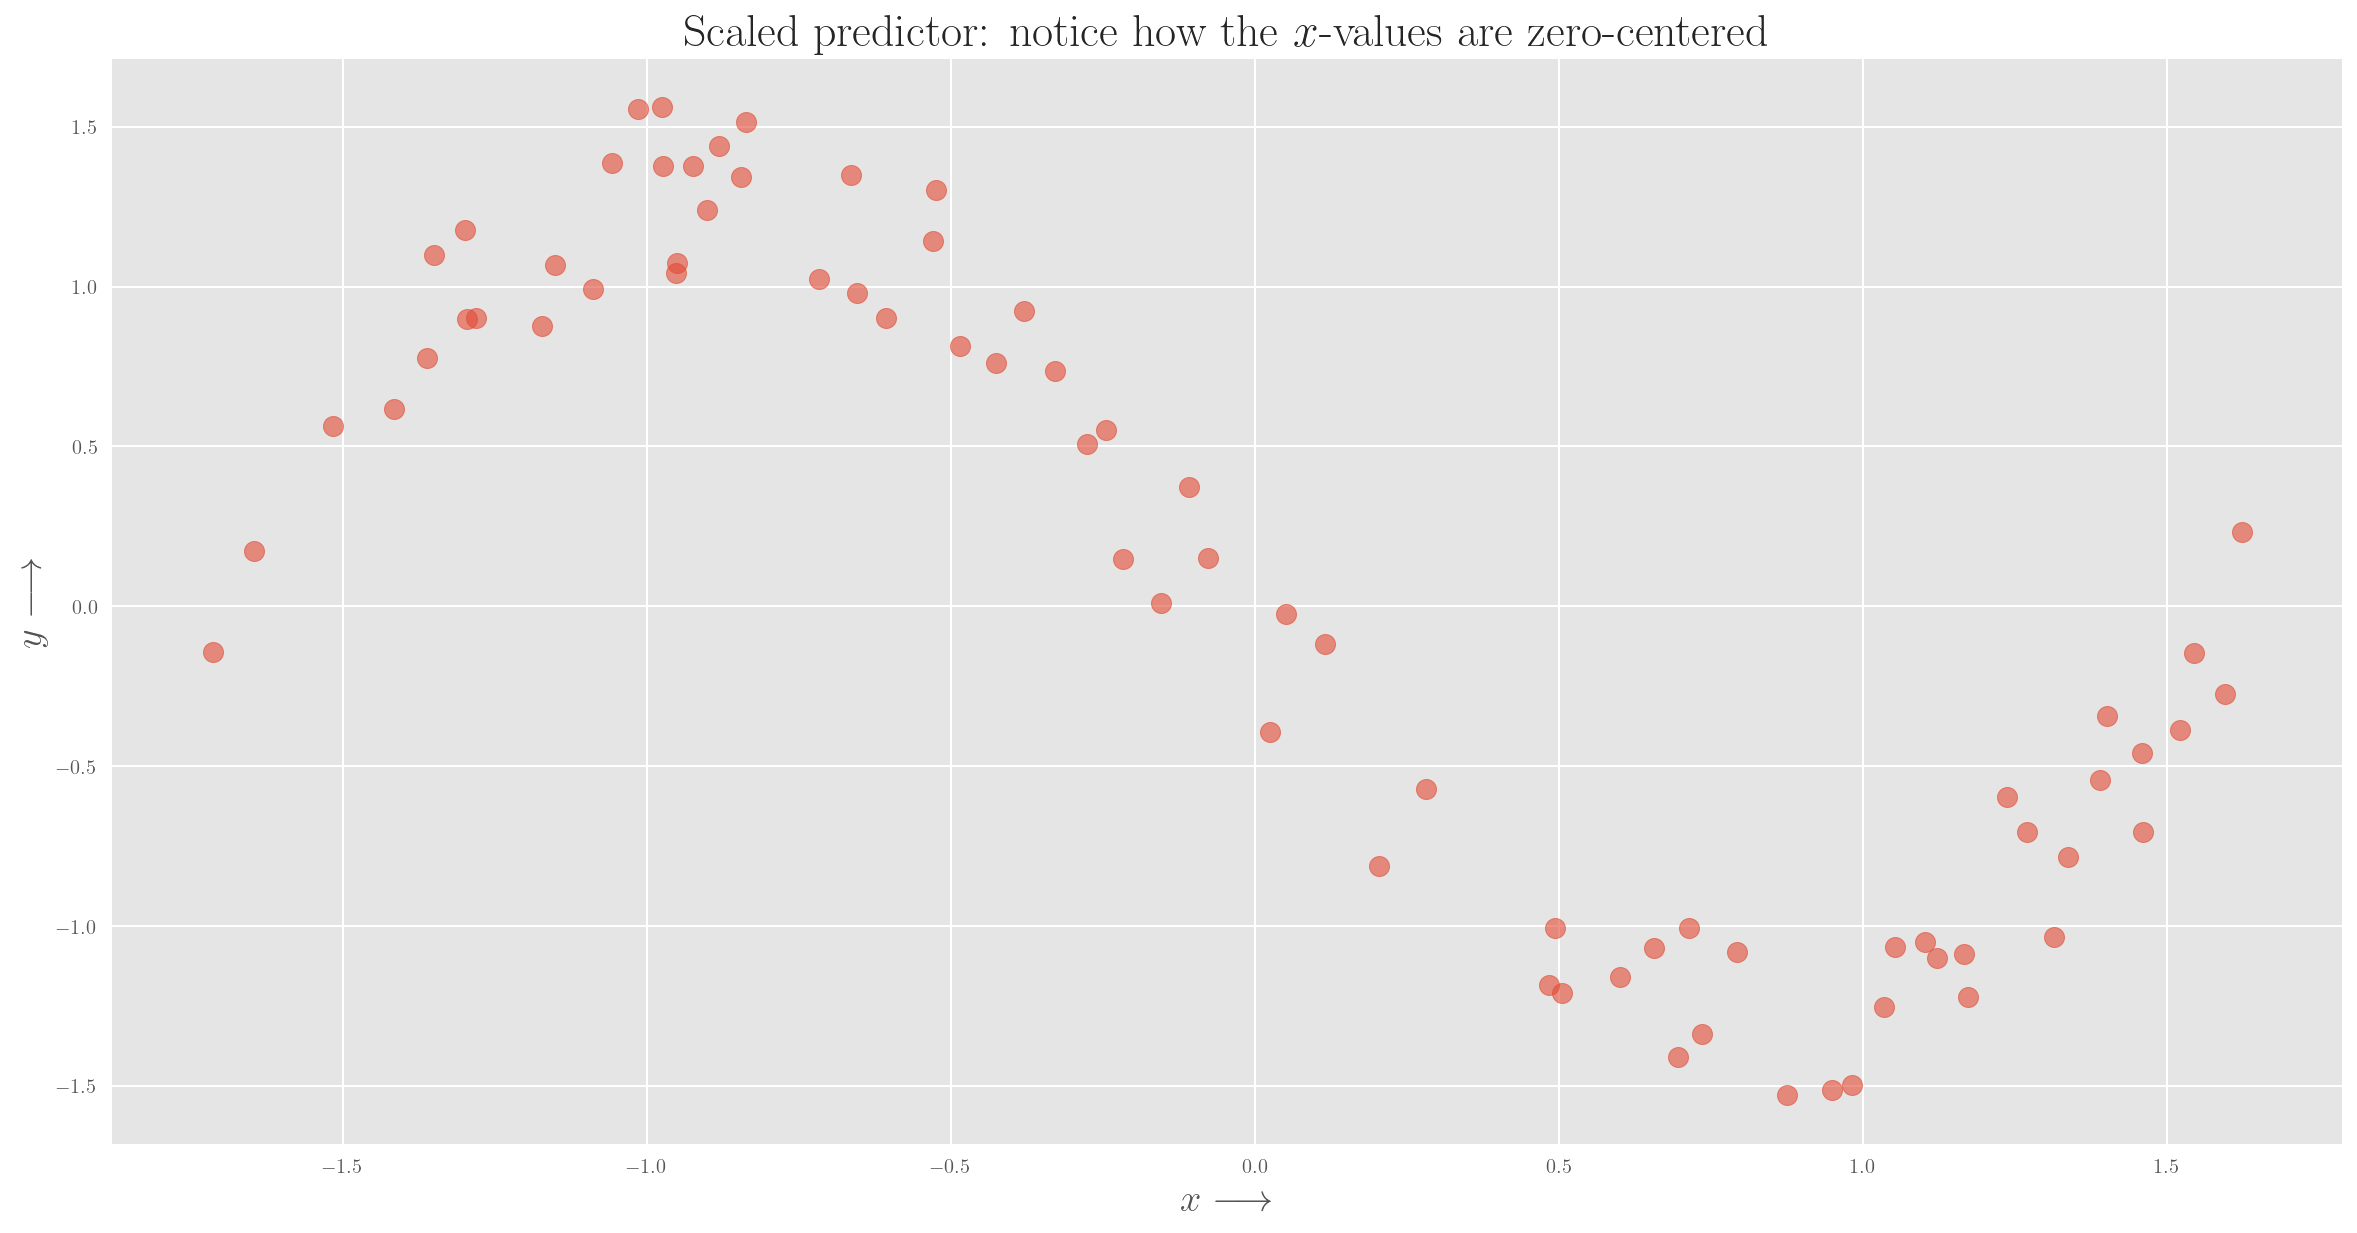

In [7]:


plt.scatter(X_train_scaled, y_train, s=100, alpha=0.6);
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');
plt.title(r'Scaled predictor: notice how the $x$-values are zero-centered');



## Adding Polynomial Features

From prior notebook, one can create an effective model by adding polynomial degree terms as predictors.

In [8]:
poly         = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly  = poly.fit_transform(X_test_scaled)

In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_poly, y_train)
model.coef_

array([ 0.        , -2.08724217,  0.07904435,  0.79558622])

In [10]:
y_test_hat = model.predict(X_test_poly)
rsquared   = r2_score(y_test_hat, y_test)
print ("The R-squared of the model: {}".format(rsquared))

The R-squared of the model: 0.9670413993139167


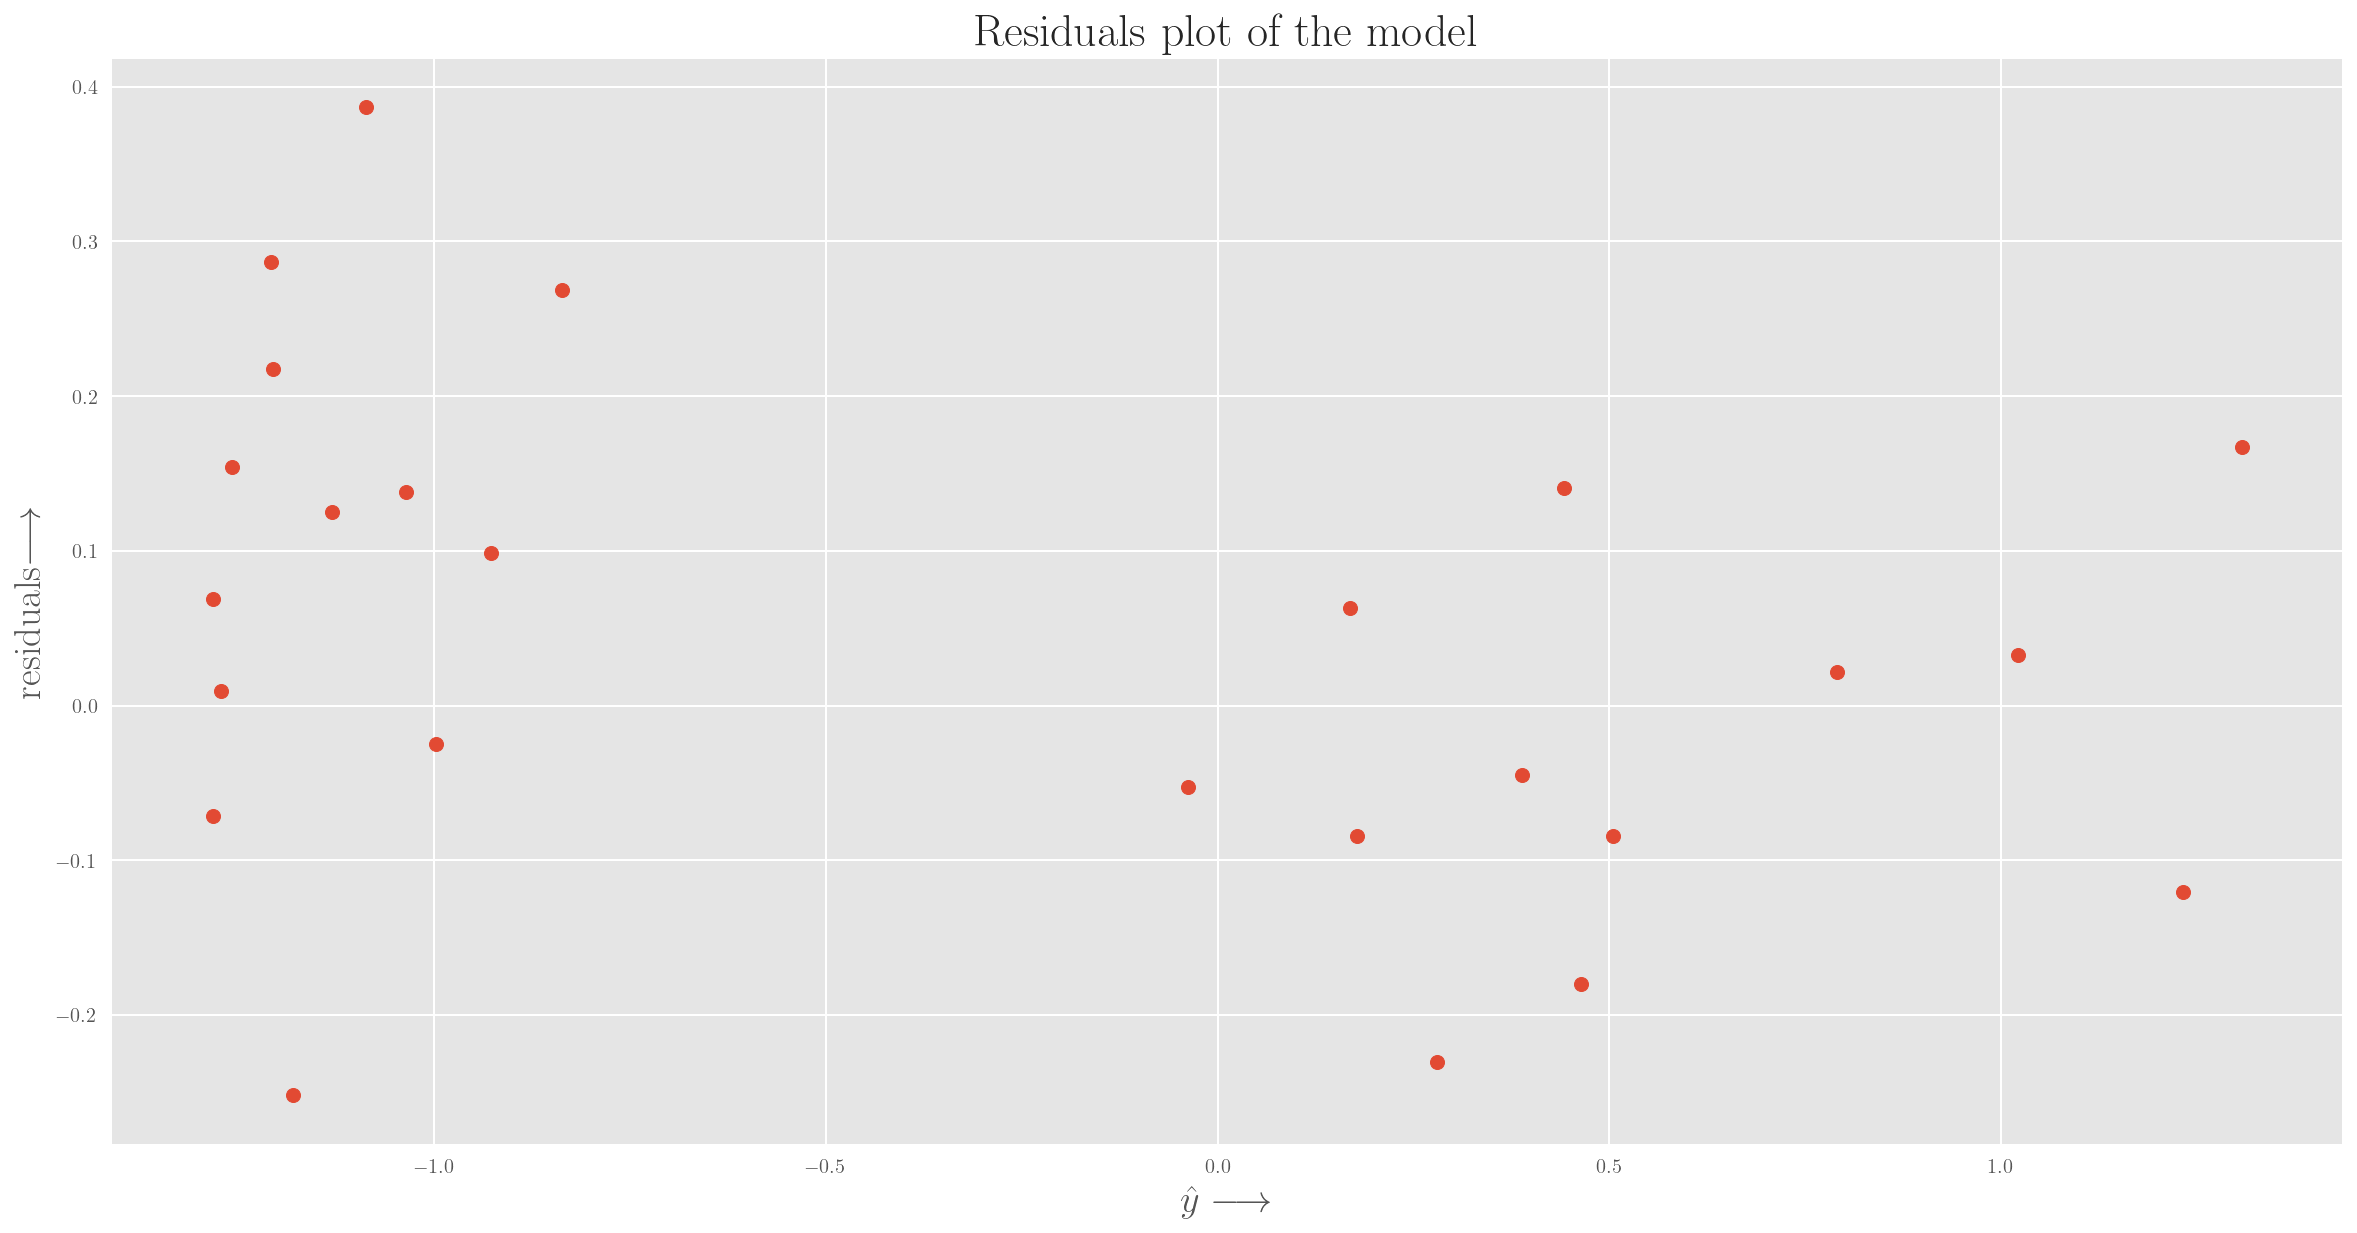

In [11]:
residuals = y_test_hat - y_test
plt.scatter(y_test_hat, residuals);
plt.xlabel(r'$\hat y\longrightarrow$');
plt.ylabel(r'residuals$\longrightarrow$');
plt.title(r'Residuals plot of the model');

# Creating Data-Processing Pipelines
While the above appears rather tedious, fortunately sklearn provides us a method to create analytical pipelines. 
* **Standardize** the input (in this situation, it is not really necessary, but illustrative)
   
* **Create Polynomial Features** Create polynomials of upto third degree of the input
 
* **Linear Regression** on the resulting standardized, polynomial expansion of the input
  

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regressor = make_pipeline(StandardScaler(),                     # scale the data
                          PolynomialFeatures(degree=3),         # create polynomial features
                          LinearRegression(fit_intercept=True)) # linear model
regressor.fit(X_train, y_train)
y_test_hat = regressor.predict(X_test)
# The rest of it remains the same
rsquared = r2_score(y_test_hat, y_test)
print ("The R-squared of the model: {}".format(rsquared))

The R-squared of the model: 0.9670413993139167


Clean syntax makes for easy interchangeability. For example, we could substitute:

* the `StandardScaler` with a `MinMaxScaler`. 
* substitute the `LinearRegression` with any other regression method, such as `Ridge`, `Lasso`, etc.

## Visualization of the model predictions

Finally, let us visualize the model predictions to verify that this exercise still produces the same effective model we have encountered with polynomial regression before.

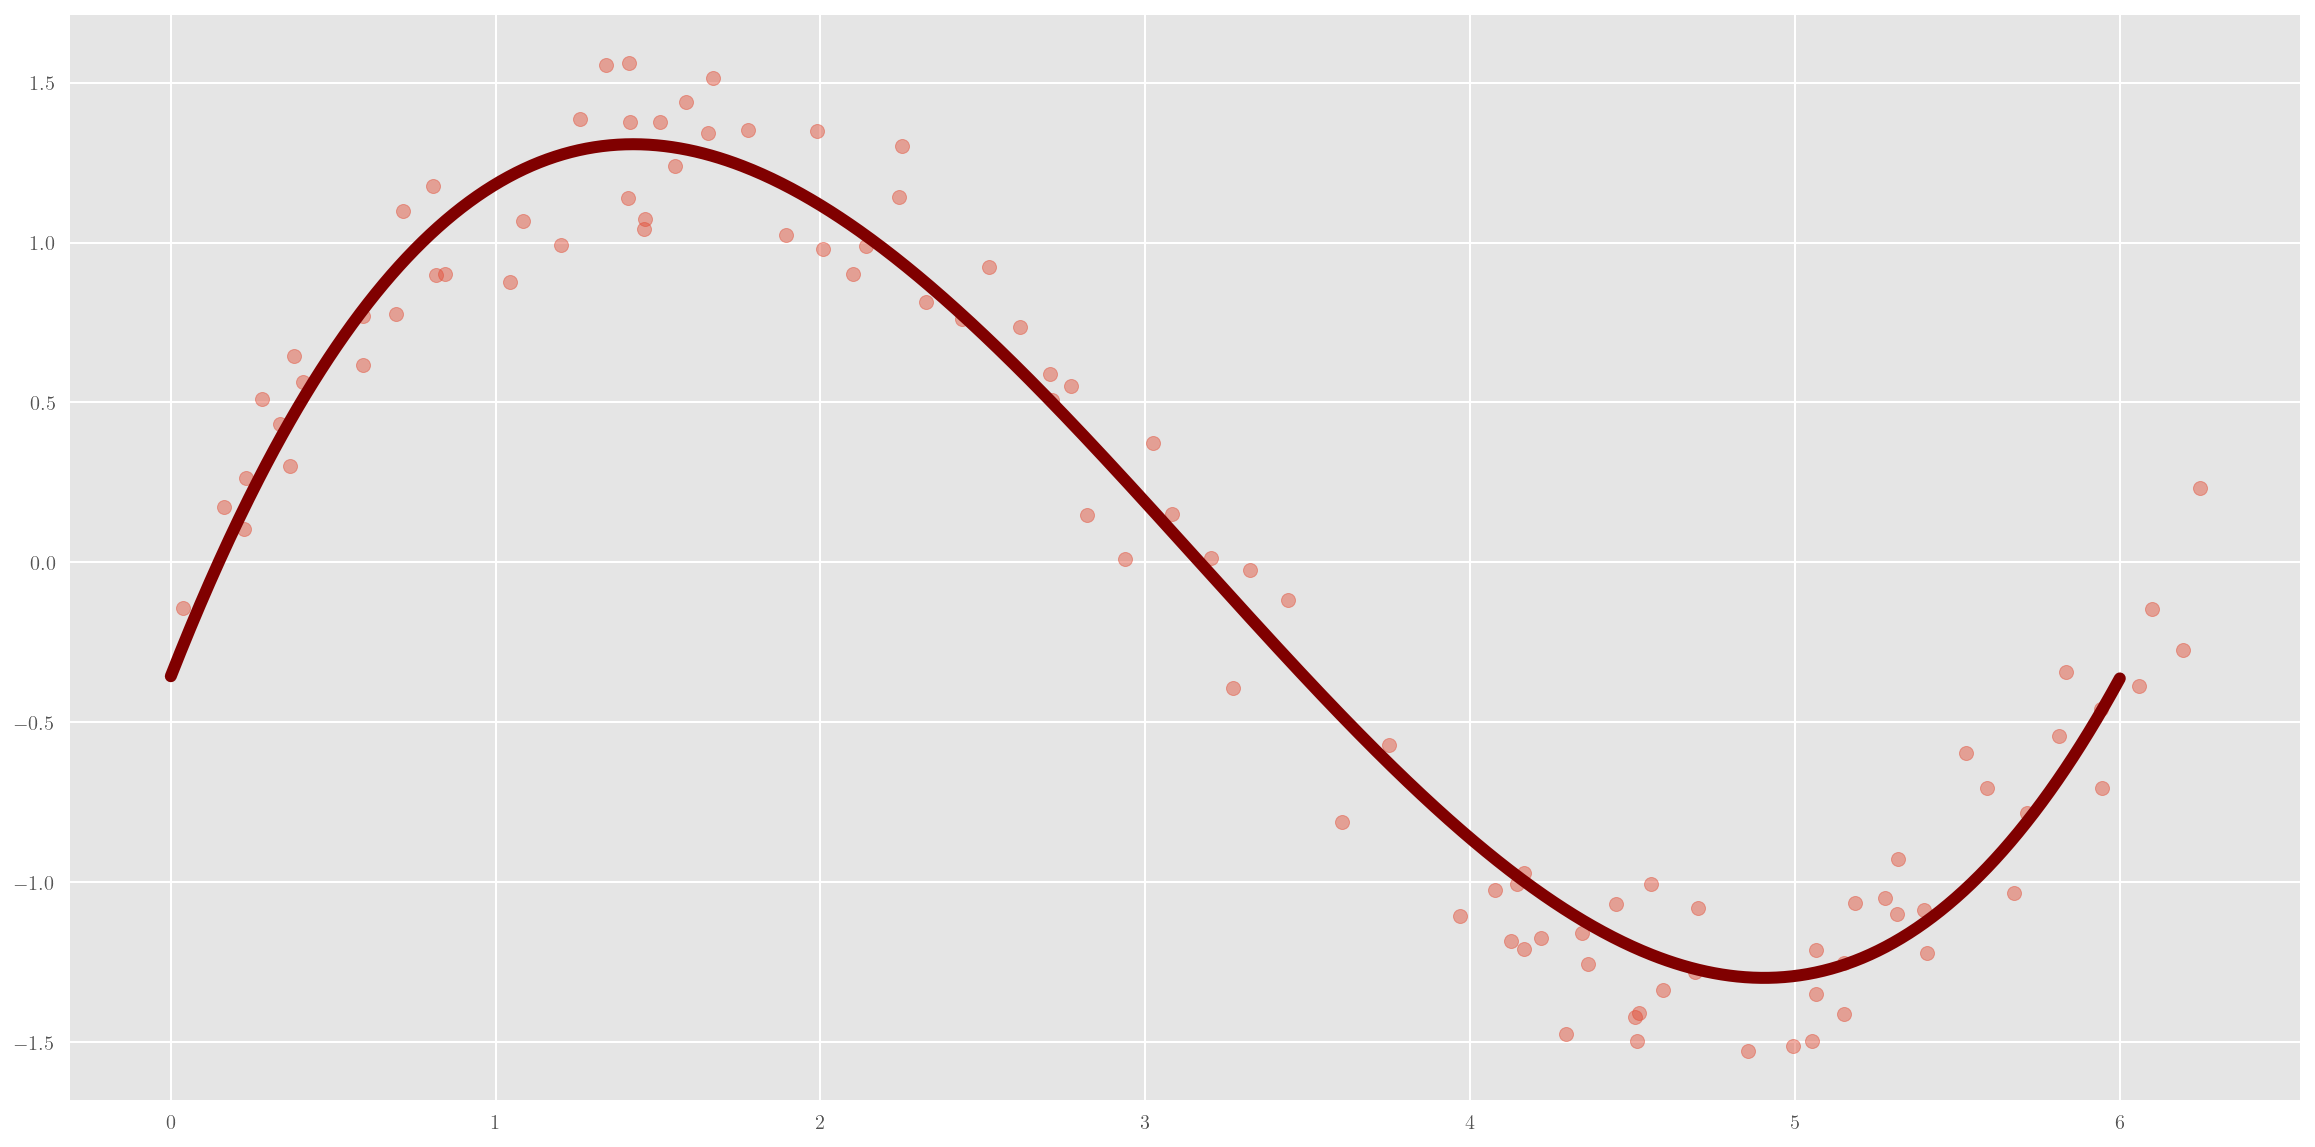

In [13]:
xx = np.linspace(0,6,1000)
XX = xx[:, np.newaxis]
yy = regressor.predict(XX)
plt.scatter(data.x, data.y, alpha=0.45)
plt.plot(xx, yy, color="maroon", linewidth=6);